2. **相关系数法**: 通过计算特征与标签之间的相关性, 或者特征之间的相关性, 筛选出与标签高相关性特征, 或者剔除冗余特征(特征间高度相关), **都是来做特征选择的方法**

    1. **皮尔逊相关系数**

    pearson相关系数衡量两个变量之间的线性关系, 值在[-1, 1]之间, 值越接近1表示两个变量呈现正相关, 值越接近-1表示两个变量呈现负相关, 值接近0表示两个变量不相关


$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
         {\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \, \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$


In [1]:
import pandas as pd

In [22]:
# 读取数据
advertising = pd.read_csv('../../data/advertising.csv')
print('\n',  advertising.head())
print('\n', advertising.describe())
print('\n', advertising.shape)
print('\n', advertising.columns)


    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

        Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

 (200, 5)

 Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [23]:
# 数据预处理
# 去掉第一列ID
advertising.drop(advertising.columns[0], axis=1, inplace=True)
# 删除缺失值
advertising.dropna(inplace=True)
# 进行特征和标签的提取
X = advertising.drop("Sales", axis=1)
y = advertising["Sales"]


 (200, 3)

 (200,)


In [24]:
print(X.shape)

(200, 3)


In [25]:
print(y.shape)

(200,)


corrwith() 方法计算的是与指定的列的相关性
corr()计算的是数据内部的相关性

In [30]:
# 计算皮尔逊相关系数
print(X.corrwith(y, method='pearson'))
corr_matrix = advertising.corr(method='pearson')
print(corr_matrix)

TV           0.782224
Radio        0.576223
Newspaper    0.228299
dtype: float64
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


可以将相关系数矩阵可视化为热力图更好的帮助理解

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

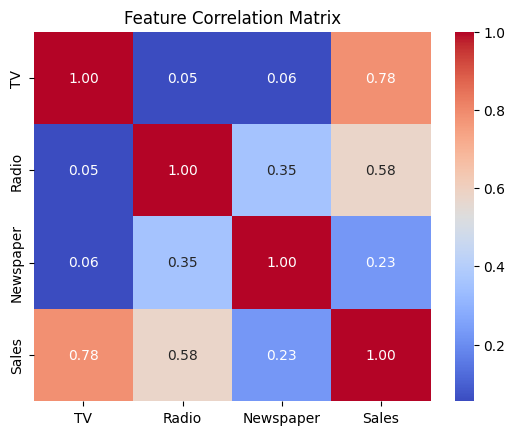

In [32]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()